### 비지도학습과 데이터전처리

##### 1. 비지도학습의 종류

비지도학습의 종류는 데이터의 `비지도변환(unsupervised transformation)`과 `군집(Clustering)`이다.

1. `비지도변환` : 오리지널 데이터를 표현하는 방법인 `차원축소(dimensionality reduction)`이다. 차원축소의 대표적인 예는 시각화를 위해 데이터셋을 2차원으로 변경하는 경우이다.
2. `군집알고리즘` : 데이터를 비슷한 것끼리 그룹으로 묶는 것이다.

##### 2. 데이터전처리와 스케일 조정

전처리방법의 종류

* `StandardScaler` : 각 `특성의 평균=0, 분산=1`로 변경. 이 방법은 특성의 최소, 최대값을 제한하지 않는다.
* `RobustScaler` : StandardScaler와 비슷하지만 평균과 분산대신에 `중앙값 Median, 4분위값 quartile`을 사용한다. 이런 방식 때문에 이상치등에 영향을 별로 받지 않는다.
* `MinMaxScaler` : 모든 특성들이 `정확하게 0~1사이에 위치`하도록 데이터를 변경
* `Normalizer` : 매우 다른 스케일조정방법이다. 이 방식은 `특성벡터의 유클리디안거리가 1`이 되도록 데이터포인터를 조정한다. 다른 말로 지금이 1인 원(3차원일 때는 구)에 데이터를 투영한다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['image.cmap'] = "gray"
# plt.rcParams['axes.xmargin'] = 0.05
# plt.rcParams['axes.ymargin'] = 0.05

import mglearn

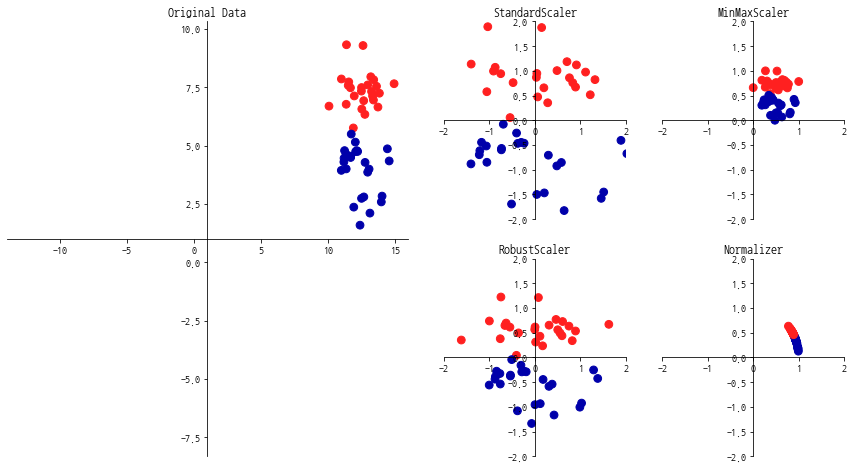

In [2]:
# 스케일 조정을 위한 인위적인 그래프
mglearn.plots.plot_scaling()

# 첫 번째 그래프는 2개의 특성을 인위적을 만든 이진 분류의 데이터셋
# 특성1(x값)은 10~15사이의 값, 특성2(값)은 1~10까지의 값

###### 실습 1. 유방암데이터 변환

유방암데이터셋에 SVM과 MinMaxScaler를 적용

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test =\
    train_test_split(cancer.data, cancer.target, random_state=0)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# 데이터변환
X_train_scaled = scaler.transform(X_train)
print("변환후 데이터크기: {}".format(X_train_scaled.shape))
print("스케일 조정전 특성별 최소값: {}".format(X_train.min(axis=0)))
print("스케일 조정전 특성별 최대값: {}".format(X_train.max(axis=0)))
print("스케일 조정후 특성별 최소값: {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정후 특성별 최대값: {}".format(X_train_scaled.max(axis=0)))

변환후 데이터크기: (426, 30)
스케일 조정전 특성별 최소값: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정전 특성별 최대값: [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
스케일 조정후 특성별 최소값: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정후 특성별 최대값: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [5]:
# 검증용데이터셋도 스케일조정
X_test_scaled = scaler.transform(X_test)
print("스케일 조정후 특성별 최소값: {}".format(X_test_scaled.min(axis=0)))
print("스케일 조정후 특성별 최대값: {}".format(X_test_scaled.max(axis=0)))

# 결과분석
# 스케일을 조정한 데스트셋의 최소값은 0~1사이의 값이 아니라 0~1사이의 범위를 벗어났다.
# 그 이유는 scaler가 훈련용으로 스케일조정이 되었기 때문에 결과는 0~1의 범위를 벗어난다.

스케일 조정후 특성별 최소값: [ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
스케일 조정후 특성별 최대값: [0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


###### 1) 훈련용과 검증용 데이터의 스케일을 동일한 방법으로 조정하기

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

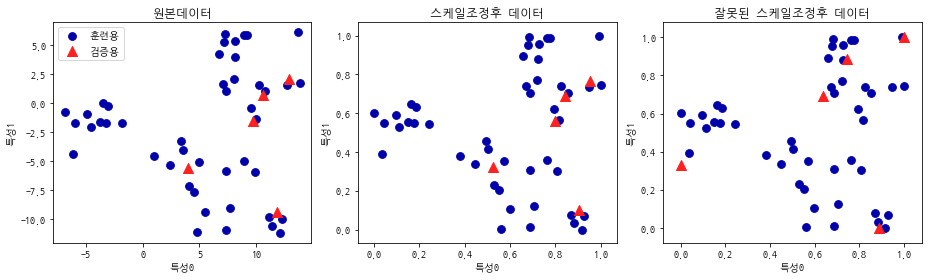

In [6]:
X, _ = datasets.make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

# 시각화
fig, axes = plt.subplots(1,3, figsize=(13,4))

# 1. 원본데이터의 시각화
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2(0), label="훈련용", s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], c=mglearn.cm2(1), label="검증용", s=100, 
                marker='^')
axes[0].legend(loc="upper left")
axes[0].set_title("원본데이터")

# 2. 스케일후 데이터의 시각화
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0), 
                label="훈련용", s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=mglearn.cm2(1), label="검증용", 
                s=100, marker='^')
axes[1].set_title("스케일조정후 데이터")

# 2. 잘못된 스케일후 데이터의 시각화
# 검증용셋의 스케일을 따로로 조정(이 예는 실습을 위한 것으로 절대 이런 방식으로 하면 않됨)
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0), 
                label="훈련용", s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], c=mglearn.cm2(1), 
                label="검증용", s=100, marker='^')
axes[2].set_title("잘못된 스케일조정후 데이터")

for ax in axes:
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
fig.tight_layout()  
plt.show()

# 결과분석
# 첫번째 그래프는 원본데이터셋, 두번째는 MinMaxScaler로 스케이조정
# 훈련세트를 fit()메서드적용후, 훈련,검증세트에 transform()메서드 적용
# 축의 눈금만 0~1범위로 변경된 것만 빼면 첫번쨰, 두번째는 동일하다. 
# 세번째는 훈련,검증셋에 서로 다른 방식의 스케일을 적용했을 때 나타나는 오류이다.

In [7]:
# 메서드체이닝기법을 사용
X_scaled = scaler.fit(X_train).transform(X_train)

# 상기와 결과는 동일하지만 fit_transform()함수사용이 더 효과적
X_scaled_d = scaler.fit_transform(X_train)

###### 2) 유방암데이터를 MinMaxScaler 스케일조정 후 SVM으로 기계학습

In [8]:
from sklearn.svm import SVC
cancer = datasets.load_breast_cancer()

# 1. 스케일조정전 SVM 기계학습
X_train, X_test, y_train, y_test =\
    train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100).fit(X_train, y_train)
print("검증용세트의 정확도: {:.3f}".format(svm.score(X_test, y_test)))

검증용세트의 정확도: 0.944


In [9]:
# 2. 스케일조정후 SVM 기계학습
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정후 SVM 학습
svm = SVC(C=100).fit(X_train_scaled, y_train)
print("스케일 조정후 검증용세트의 정확도: {:.3f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정후 검증용세트의 정확도: 0.965


###### 3) 유방암데이터를 StandardScaler 스케일조정 후 SVM으로 기계학습

* 평균 = 0, 분산 = 1 사이의 값을 갖도록 조정

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정후 SVM 학습
svm = SVC(C=100).fit(X_train_scaled, y_train)
print("스케일 조정후 검증용세트의 정확도: {:.3f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정후 검증용세트의 정확도: 0.958


In [11]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정후 SVM 학습
svm = SVC(C=100).fit(X_train_scaled, y_train)
print("스케일 조정후 검증용세트의 정확도: {:.3f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정후 검증용세트의 정확도: 0.951


###### 연습문제
 유방암, IRIS데이터셋을 가지고 스케일조정전후 비교 및 시각화를 실행
 머신러닝 알고리즘은 SVM, KMeans 2개의 알고리즘을 적용

### 김승혁

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

NameError: name 'KMeans' is not defined

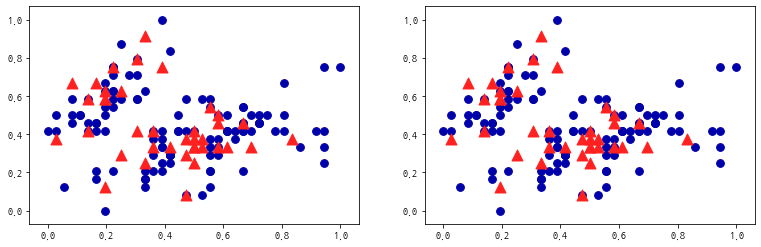

In [12]:
import sklearn.metrics as sm
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,random_state=0)

# iris데이터 전처리 - minmax
scaler = MinMaxScaler().fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

# 전처리 전후 데이터 분포 변화 확인 - 변화 x
fig, axes = plt.subplots(1,2,figsize=(13,4))

axes[0].scatter(x_train_std[:,0],x_train_std[:,1], c=mglearn.cm2(0), label = '훈련용', s=60)
axes[0].scatter(x_test_std[:,0],x_test_std[:,1], c=mglearn.cm2(1), label = '검증용', s=120,marker='^')

axes[1].scatter(x_train_std[:,0],x_train_std[:,1], c=mglearn.cm2(0), label = '훈련용', s=60)
axes[1].scatter(x_test_std[:,0],x_test_std[:,1], c=mglearn.cm2(1), label = '검증용', s=120,marker='^')

# k-means - iris데이터는 3개의 종류가 있으서 n_clusters를 3으로 지정
kmeans = KMeans(n_clusters=3).fit(x_train_std)

# 타겟이 다르게 분류된 것을 원래와 같게 분류
predY = np.choose(kmeans.labels_, [0,1,2]).astype(np.int64)

plt.figure(figsize=(14,7))
colormap=np.array(['red','black','lime'])
plt.subplot(1,2,1) # 정답
plt.scatter(x_train_std[:,0],x_train_std[:,3], c= colormap[y_train]) 

plt.subplot(1,2,2) # 예측
plt.scatter(x_train_std[:,0],x_train_std[:,3], c= colormap[predY])

print(sm.accuracy_score(y_train,predY))

svm = SVC(C=100).fit(x_train_std, y_train)

print('검증용세트의 정확도 : {:.3f}'.format(svm.score(x_test_std, y_test)))

# 유방암데이터
cancer = datasets.load_breast_cancer()
scaler = StandardScaler().fit(cancer.data)
x = scaler.transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(x, cancer.target, random_state = 0)

svm = SVC(C=100).fit(x_train, y_train)
print('검증용세트의 정확도 : {:.3f}'.format(svm.score(x_test, y_test)))

X = pd.DataFrame(x_train, columns= cancer.feature_names)

x = X.iloc[:,[7, 9, 14, 27]]

kmeans = KMeans(n_clusters=2).fit(x)

predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)

plt.figure(figsize=(14,7))
colormap=np.array(['red','black'])
plt.subplot(1,2,1) # 정답
plt.scatter(x.iloc[:,0],x.iloc[:,3], c= colormap[y_train]) # 꽃잎기준 정답

plt.subplot(1,2,2) # 예측
plt.scatter(x.iloc[:,0],x.iloc[:,3], c= colormap[predY])

# 정규분포로 정규화를 했더니 정확도가 더 떨얼짐
print(sm.accuracy_score(y_train,predY))

### 이은수

조정 전 SVM 정확도 : 0.951
조정 전 kmeans 정확도 : 0.854

조정 후 SVM 정확도 : 0.916
조정 전 kmeans 정확도 : 0.928


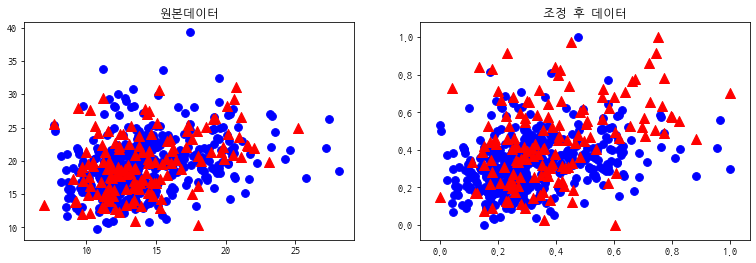

조정 전 SVM 정확도 : 0.800
조정 전 kmeans 정확도 : 0.240

조정 후 SVM 정확도 : 0.978
조정 전 kmeans 정확도 : 0.240


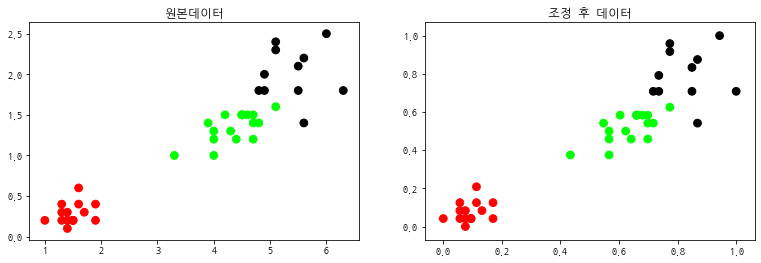

In [13]:
# 유방암 데이터셋
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.metrics as sm

cancer = datasets.load_breast_cancer()
X, y = pd.DataFrame(cancer.data), pd.DataFrame(cancer.target)
y.columns = ['Targets']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 조정 전
svm = SVC().fit(X_train, y_train)
print('조정 전 SVM 정확도 : {:.3f}'.format(svm.score(X_test, y_test)))

kmeans = KMeans(n_clusters=2).fit(X)
print('조정 전 kmeans 정확도 : {:.3f}'.format(sm.accuracy_score(y, kmeans.labels_)))
print()

# 조정 후
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)
svm = SVC().fit(X_train_scaled, y_train)
print('조정 후 SVM 정확도 : {:.3f}'.format(svm.score(X_test_scaled, y_test)))

X_scaled = MinMaxScaler().fit_transform(X)
kmeans = KMeans(n_clusters=2).fit(X_scaled)
print('조정 전 kmeans 정확도 : {:.3f}'.format(sm.accuracy_score(y, kmeans.labels_)))

# 시각화
fig, axes = plt.subplots(1,2,figsize=(13,4))

# 1. 원본데이터
axes[0].scatter(X_train.iloc[:,0], X_train.iloc[:,1], c='b', s=60)
axes[0].scatter(X_test.iloc[:,0], X_test.iloc[:,1], c='r', s=100, marker='^')
axes[0].set_title("원본데이터")

# 2. 조정 후 데이터
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c='b', s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], c='r', s=100, marker='^')
axes[1].set_title("조정 후 데이터")

plt.show()



# IRIS 데이터셋
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.3, random_state=0)

# 조정 전
svm = SVC(C=0.1).fit(X_train, y_train)
print('조정 전 SVM 정확도 : {:.3f}'.format(svm.score(X_test, y_test)))

kmeans = KMeans(n_clusters=3).fit(iris.data)
print('조정 전 kmeans 정확도 : {:.3f}'.format(sm.accuracy_score(iris.target, kmeans.labels_)))
print()

# 조정 후
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)
svm = SVC().fit(X_train_scaled, y_train)
print('조정 후 SVM 정확도 : {:.3f}'.format(svm.score(X_test_scaled, y_test)))

X_scaled = MinMaxScaler().fit_transform(iris.data)
kmeans = KMeans(n_clusters=3).fit(X_scaled)
print('조정 전 kmeans 정확도 : {:.3f}'.format(sm.accuracy_score(iris.target, kmeans.labels_)))

# 조정 전 시각화
fig, axes = plt.subplots(1,2,figsize=(13,4))
colormap = np.array(['red', 'lime', 'black'])

# 1. 원본데이터
axes[0].scatter(X_test[:,2], X_test[:,3], c=colormap[y_test], s=60)
axes[0].set_title("원본데이터")

# 2. 조정 후 데이터
axes[1].scatter(X_test_scaled[:,2], X_test_scaled[:,3], c=colormap[y_test], s=60)
axes[1].set_title("조정 후 데이터")

plt.show()

### 차원축소, 특성추출

* PCA : 주성분분석 Princpal Component Analysis
* NMF : 비음수행렬분해 Nonn-negative Matrix Factorization
* t_SNE : 고차원의 데이터셋을 2차원 산점도를 이용해서 시각화용도로 많이 사용 t-Distributed Stochastic Neighbor Embeding

###### 1. 주성분 분석(PCA)

* 주성분분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기법
* 분포된 데이터셋에서 주성분을 찾는 알고리즘이다.
* 데이터셋의 데이터들을 하나하나에 대한 성분을 분석하는 것이 아니라 여러데이터들이 모여 하나의 분포를 이룰 때 이 `분포의 주성분`을 분석해주는 방법이다.

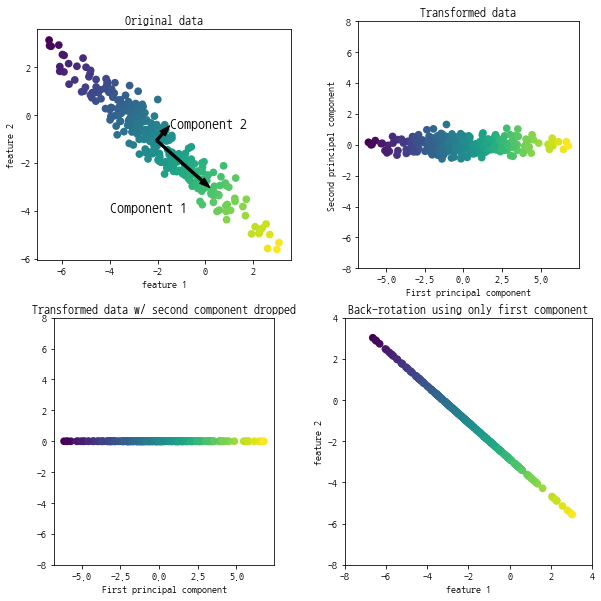

In [14]:
# 주성분분석을 위한 인위적은 데이터셋의 시각화
mglearn.plots.plot_pca_illustration()

###### 결과분석

첫 번째 그래프는 원본데이터셋의 데이터포인트를 색으로 구분한 그래프. 이 알고리즘은 `성분1 Component 1`의 분산이 가장 큰 방향을 찾는다. 이 방향(벡터)이 예제 데이터셋에서 가장 많은 정보를 담고있는 방향이다. 다른 말로 `특성들의 상관관계가 가장 큰 방향`이다.

그 다음으로 첫번째 방향과 `직각방향 중에서 가장 많은 정보를 담은 방향`을 검색한다. 2차원에서는 직각방향이 하나이지만 고차원에서는 직각방향이 무수히 많은 방향이 있을 수 있다.

이 두성분을 화살표로 나타냈지만 사실 화살표의 머리와 꼬리는 아무런 의미가 없다. 즉, 화살표를 중앙에서 오른쪽아래가 아니라 왼쪽위로 그릴 수 있다. 이런 과정을 거쳐 찾은 방향을 데이터에 있는 `주된 분산의 방향이라고 해서 주성분`이라고 한다. 일반적으로 원본의 특성의 갯수 만큼 주성분이 있다.

두번째(우상)그래프는 같은 데이터이지만 주성분1과 2를 각각 X축, Y축에 나란히 회전한 것이다. 회전하기전에 데이터에서 평균을 빼서 중심을 원점에 위치시켰다. PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 `상관관계행렬 correlation matrix`이 대각선방향을 제외하고는 0이 된다.

PCA는 주성분의 일부만 남기는 `차원축소용`으로도 사용할 수 있다. 세번쨰그래프(좌하)는 첫번째 주성분만 유지하려고 한다.
이렇게 하면 2차원에서 1차원으로 차원이 축소가 된다.

마지막으로 데이터에 평균을 더해서 반대로 회전. 네번째그래프(우하)의 데이터 포인트들은 원래의 특성공간에 놓여져 있지만 첫번째 주성분의 정보만 담고 있다. 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화 하는데 종종 사용한다.

###### 1) 시각화를 위해 유방암데이터셋에 PCA적용하기

PCA에서 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화이다. 특성간의 상관관계를 시각화하기 위해 산점도행렬을 그리는 경우가 있는데 유방암데이터셋은 특성이 30개나 가지고 있어 산점도행렬을 그리기가 어렵다 이보다 쉬운 방법은 악성과 양성 두클래스에 대한 각 특성의 히스토그램을 그리는 것이다.

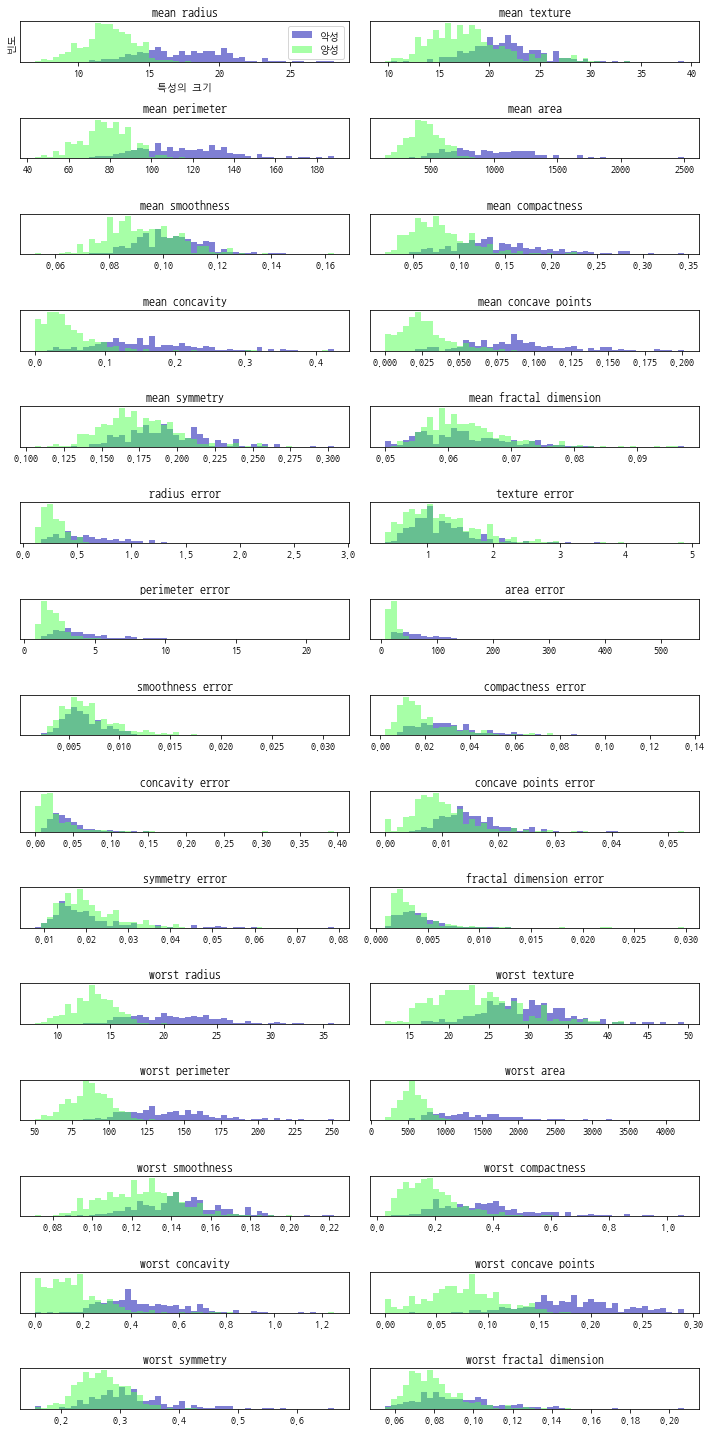

In [15]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("특성의 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()
plt.show()

# 결과분석
# 각 특성들이 클래스별로 어떻게 분포되어 있는지를 알려주고 이를 통해 어떤 특성이 양성과 악성샘플을 
# 구분하는데 유용한지를 추측해 볼 수 있다.
# 예를 들어 smoothness err특성은 두개의 히스토그램이 거의 겹쳐 있어 별로 쓸모가 없고 worst concave points는
# 확실히 양성과 악성이 구분이 되어 매우 유용한 특성이다.
# 하지만 이 해당 그래프는 특성간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알 수가
# 없다. PCA를 사용하면 각 특성들의 주요 상호작용을 찾아 낼 수가 있어 더 나은 그림을 만들 수가 있다.

###### 유방암데이터셋을 PCA로 분석하기

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
cancer = load_breast_cancer()
scaler = StandardScaler().fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# 데이터의 처음두개(mean radius, mean texture)만 주성분으로 유지
# 유방암데이터셋을 PCA로 기계학습
pca = PCA(n_components=2).fit(X_scaled)

# 처음 두개의 주성분을 사용해서 데이터를 변환
X_pca = pca.transform(X_scaled)

# 원본데이터크기 vs PCA로 변환된 데이터의 크기
print("원본데이터셋의 형태: {}".format(str(X_scaled.shape)))
print("축소데이터셋의 형태: {}".format(str(X_pca.shape)))

원본데이터셋의 형태: (569, 30)
축소데이터셋의 형태: (569, 2)


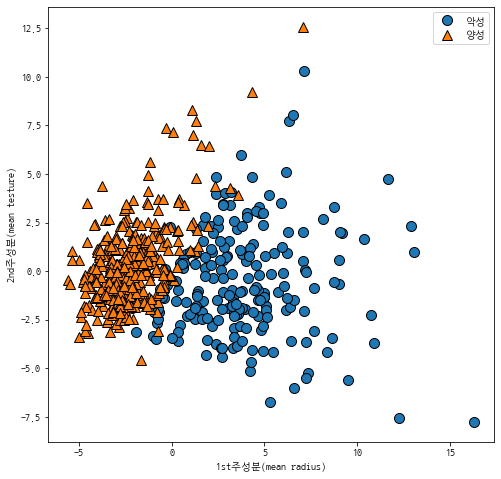

In [18]:
# 주성분으로 클래스별로 시각화
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.xlabel('1st주성분(mean radius)')
plt.ylabel('2nd주성분(mean testure)')
fig.tight_layout()
plt.show()

# 결과분석
# PCA는 비지도학습이기 때문에 회전축을 찾을 때 어떤 클래스의 정보도 사용하지 않는다. 단순히 데이터에 있는
# 상관관계만 고려한다. 그래서 악성이 양성보다 더 넓게 분로하고 있다. 하지만 그래프를 통해서 두축을 해석하기가
# 쉽지않다는 단점이 있다.
# PCA가 학습될 때 components_속성에 저장된다.

In [19]:
# 주성분의 형태와 주성부의 결과값
print("PCA 주성분의 형태: {}".format(pca.components_.shape))
print("PCA 주성분: {}".format(pca.components_))

PCA 주성분의 형태: (2, 30)
PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


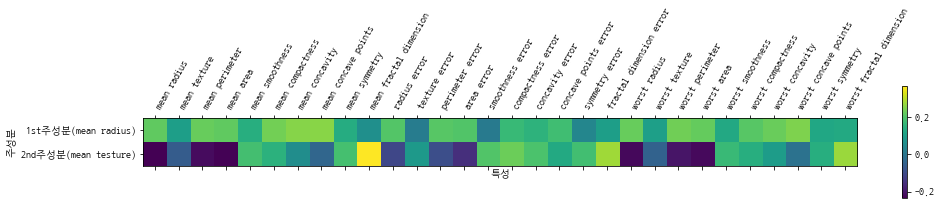

In [20]:
# 주성분의 상관관계를 Hitmap으로 시각화
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0,1], ["1st주성분(mean radius)","2nd주성분(mean testure)"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")
plt.show()

# 결과분석
# 첫번째 주성분의 모든 특성은 부호가 같다(모두 양수이지만 화살표방향은 의미가 없다.) 이 말은 모든 특성
# 사이에 공통의 상호관계가 있다는 뜻이다. 따라서 한 특성의 값이 커지면 다른 값도 커질 것이다.
# 두번째 주성분은 부호가 섞여 있다. 두 주성분 모두 300개의 특성이 있고 모든 특성이 섞여 있기 때문에 
# 그래프의 축이 가지는 의미를 설명하기 쉽지 않다.`

###### 실습 2. 고유얼굴 특성 추출

`PCA`는 특성추출에도 이용한다. 특성추출은 원본 데이터표현보다 분석하기에 더 적합한 표현을 찾을 수 있다라는 생각에서 출발한다. 이미지를 다루는 애플리케이션은 특성추출에 도움이 되는 예제이다. 이미지는 RGB강도가 기록된 픽셀로 구성된다.

PCA를 이용하여 `LFW Labeled Faces in the Wild`데이터셋의 얼굴이미지에수 특성을 추출하고 NMF와 K-means의 결과를 비교해 보자 이 이미지는 유명인사의 얼굴이미지들로 정치가, 가수, 배우, 운동선수등 62명의 얼굴이미지로 3023개의 이미지를 제공. 이미지의 사이지는 87x65픽셀이다.

In [21]:
from sklearn.datasets import fetch_lfw_people

(3023, 87, 65)


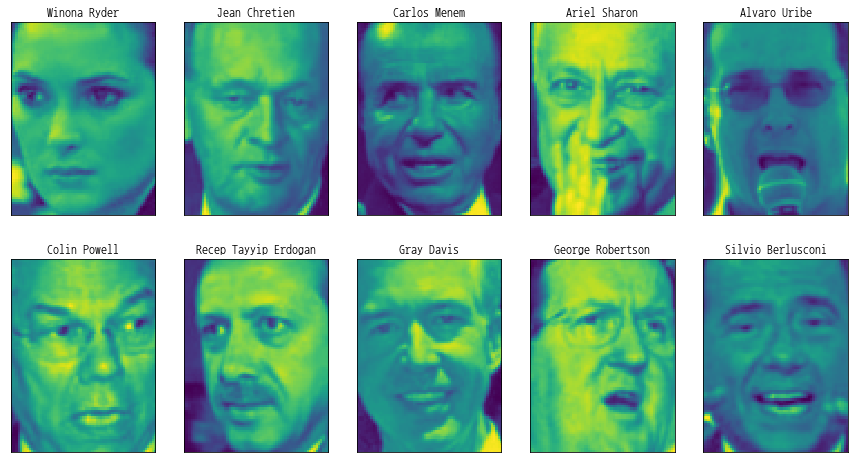

In [22]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(people.images.shape)

# 샘플이미지시각화
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [23]:
# 데이터의 편중을 없애기 위해 사람당 50개의 이미지만 선택
# 이렇게 하지 않으면 부시의 사진만 제일 많이 나올 가능성이 있다.
mask = np.zeros(people.target.shape, dtype=np.bool)
print(mask)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
print(mask)

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255사이의 흑백이미지의 픽셀 값을 0~1사이의 값으로 스케일조정
# MinMaxScaler을 적용하는 것과 거의 동일한 결과이다.
X_people = X_people / 255.0 # 컬러이미지를 흑백이미지로 변환

[False False False ... False False False]
[ True  True  True ... False False False]


In [24]:
# 얼굴인식이라하면 통상적으로 새로운 이미지가 데이터베이스에 있는 이미지와 일치여부의 작업
# 가장 간단한 방법으로 KNN알고리즘을 사용
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# 이웃의 갯수를 1개로 설정
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print("최근접이웃의 갯수를 1로 설정한 검증데이터셋의 정확도: {:.3f}".format(knn.score(X_test, y_test)))

# 결과분석
# 정확도가 23%로 많이 떨어진다. 이를 해결하기위해 PCA를 적용

최근접이웃의 갯수를 1로 설정한 검증데이터셋의 정확도: 0.233


In [25]:
# PCA로 학습후에 100개의 주성분을 추출한 후에 훈련, 검증용셋을 변환
# whiten옵션은 주성분의 스케일이 같아지도록 조정하는 옵션.
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# 주성분으로 선택한 데이터셋의 크기
print("주성분을 선택한 데이터의 형태: {}".format(X_train_pca.shape))

주성분을 선택한 데이터의 형태: (1547, 100)


In [26]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_train)
print("최근접이웃의 갯수를 1로 설정한 검증데이터셋(pca)의 정확도: {:.3f}".format(knn.score(X_test_pca, y_test)))

# 결과분석
# pca를 적용한 KNN과 적용하지 않는 KNN의 결과는 31% vs 23%로 향상되었기 때문에 주성분의 데이터가
# 더 잘 예측한다고 할 수 있다. 하지만 예측율이 많이 낮기 때문에 여전히 머신러닝알고리즘으로는 이미지를
# 분석하기에는 어려움이 많은 걸 알 수가 있다.

최근접이웃의 갯수를 1로 설정한 검증데이터셋(pca)의 정확도: 0.312


In [27]:
# 주성분의 테이터 형태
print("주성분의 테이터 형태: {}".format(pca.components_.shape))

주성분의 테이터 형태: (100, 5655)


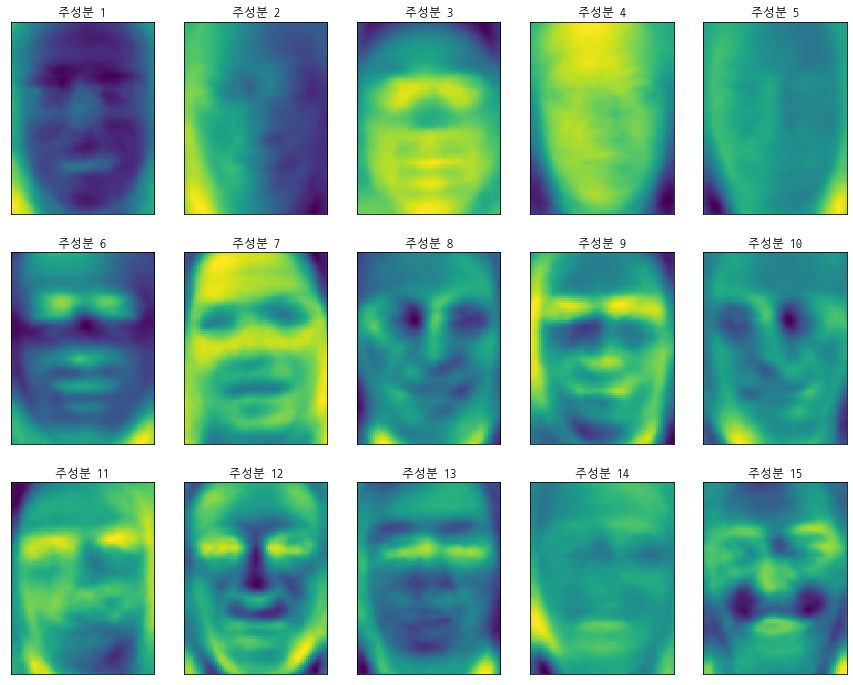

In [28]:
# 주성분으로 그리는 이미지의 시각화
fig, axes = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format(i+1))

plt.show()

# 결과분석
# 주성분1은 얼굴과 배경의 명암차이, 주성분2는 오른쪽과 왼쪽의 조명의 차이가 있다.
# 이런 방식은 원본픽셀의 갯수를 사용하는 것보다 주성분의 갯수가 훨씬 적기 때문에 기계학습의 성능면에서는 의미가
# 있지만 사람의 얼굴을 인식하는 방식과는 거리가 멀다.
# PCA모델은 픽셀을 기반으로 하므로 얼굴의 배치와 조명이 두 이미지가 얼마나 유사한지 판단하는데는 큰 영향을 주지만
# 사람의 얼굴의 유사도를 판단할 때는 나이, 성별, 표정, 머리모양과 같이 픽셀의 강도로 표현하기 어려운 속성들을
# 사용하기 때문에 PCA로 판단하는 이미지의 정확도는 떨어 질 수 밖에 없다.

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 2.1s, 0.0min


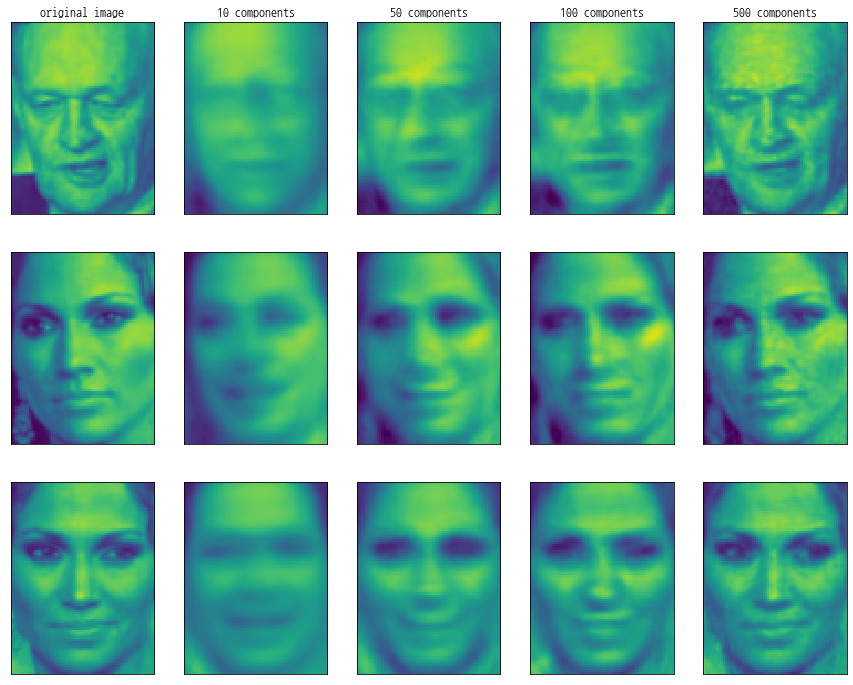

In [29]:
# 주성분 갯수에 따른 얼굴이미지의 재구성(시각화)
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

#### 실습 3.  붓꽃 데이터의 차원축소(PCA)

* iris 데이터에서 10개의 데이터 즉, 10개의 표본만 선택해서 꽃잎의 길이와 넓이데이터를 가지고 실습

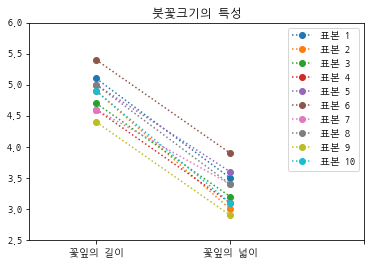

In [30]:
iris = datasets.load_iris()
N = 10 # 10개의 데이터만 추출
X = iris.data[:N, :2] # 10개의 표본,  꽃잎의 길이와 넓이

# 시각화
plt.plot(X.T, 'o:')
plt.xticks(range(4), ["꽃잎의 길이", "꽃잎의 넓이"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.legend(["표본 {}".format(i+1) for i in range(N)])
plt.title("붓꽃크기의 특성")
plt.show()

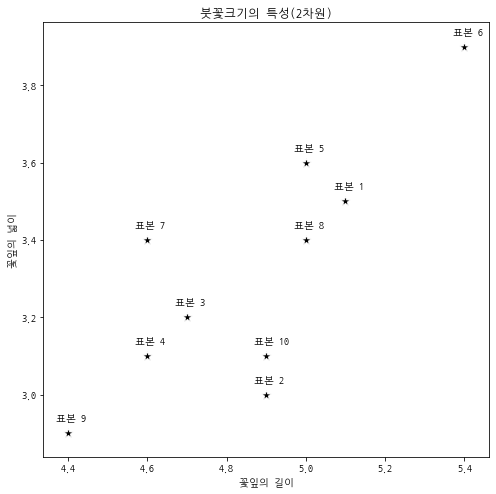

In [31]:
import seaborn as sns

plt.figure(figsize=(8,8))
ax = sns.scatterplot(0,1, data=pd.DataFrame(X), s=100, color='k', marker='*')

for i in range(N):
    ax.text(X[i,0]-0.03, X[i,1]+0.03, "표본 {}".format(i+1))

plt.xlabel("꽃잎의 길이")
plt.ylabel("꽃잎의 넓이")
plt.title("붓꽃크기의 특성(2차원)")
plt.show()

In [32]:
# 2차원 데이터를 PCA를 적용해서 1차원으로 축소하기
pca = PCA(n_components=1)
X_low = pca.fit_transform(X)  # 차원축소된 데이터셋
X2 = pca.inverse_transform(X_low) # PCA가 적용된 원본(유사한) 데이터셋

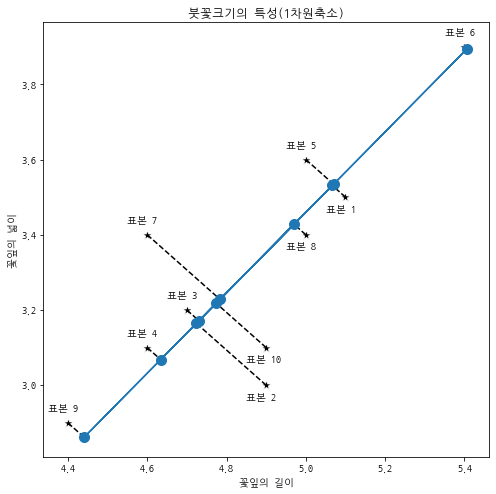

In [33]:
# 차원축소된 데이터셋으로 그리는 그래프
plt.figure(figsize=(8,8))
ax = sns.scatterplot(0,1, data=pd.DataFrame(X), s=100, color='k', marker='*')

for i in range(N):
    d = 0.03 if X[i,1] > X2[i,1] else -0.04
    ax.text(X[i,0]-0.05, X[i,1]+d, "표본 {}".format(i+1))
    plt.plot([X[i,0], X2[i,0]], [X[i,1], X2[i,1]], "k--")
    
plt.plot(X2[:,0], X2[:,1], "o-", markersize=10)

plt.xlabel("꽃잎의 길이")
plt.ylabel("꽃잎의 넓이")
plt.title("붓꽃크기의 특성(1차원축소)")
plt.show()

In [34]:
# 가장 근사값을 갖는 데이터의 포인트
pca.components_

array([[0.68305029, 0.73037134]])

#### 실습 4. 주식가격의 예측(PCA)

PCA는 다양한 분야에서 사용된다. 그 중에 금융분야에서 어떻게 쓰이는지를 실습하는 것으로 미국, 일본, 유럽 한국의 과거 20년간의 주가를 PCA알고리즘을 적용해보는 실습이다.

In [37]:
# 과거주가자료 가져오기
import pandas_datareader.data as web
import datetime

pd.core.common.is_list_like = pd.api.types.is_list_like

symbols = [
    "SPASTT01USM661N", 
    "SPASTT01JPM661N", 
    "SPASTT01EZM661N",
    "SPASTT01KRM661N",
]
data = pd.DataFrame()

for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred',
                              start=datetime.datetime(1998,1,1),
                              end=datetime.datetime(2017,12,31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data.head()

,US,JP,EZ,KR
DATE,,,,
1998-01-01,49.924498,78.110659,65.784650,23.629733
1998-02-01,52.699643,81.830767,70.732175,26.113828
1998-03-01,55.526196,81.520059,77.635309,26.004440
1998-04-01,57.244881,78.773329,83.265497,22.087366
1998-05-01,56.889428,78.267946,85.029071,17.716830


In [38]:
data = data / data.iloc[0] * 100
data.tail()

,US,JP,EZ,KR
DATE,,,,
2017-08-01,222.240836,133.126191,160.043713,498.806919
2017-09-01,226.065210,135.244650,162.465740,499.082569
2017-10-01,231.614360,141.958192,167.133563,517.372275
2017-11-01,232.247879,147.183779,167.140390,533.101170
2017-12-01,238.449682,149.341025,166.279282,518.984092


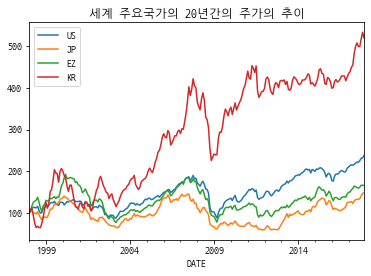

In [39]:
# 주요국가의 20년간 주가의 추이(시각화)
data.plot()
plt.title("세계 주요국가의 20년간의 주가의 추이")
plt.show()

In [40]:
# 연간수익율 데이터 구하기
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
df.head()

DATE,1998-12-31,1999-12-31,2000-12-31,2001-12-31,2002-12-31,2003-12-31,2004-12-31,2005-12-31,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31
US,14.249290,10.800392,1.094171,-9.638213,-17.680773,23.135271,14.233654,9.135500,16.669812,7.947193,-43.692676,29.820439,9.341795,-5.543249,13.010846,21.299603,6.609915,-5.743802,8.675742,14.638502
JP,-8.567915,47.802619,-18.365577,-23.827406,-16.923968,19.628102,9.945947,44.912009,2.113724,-8.489431,-44.929412,7.746080,0.138706,-18.221219,11.344079,54.198614,12.293250,9.842221,-1.725372,18.768869
EZ,21.308040,36.872314,1.375330,-21.857080,-30.647772,12.066127,10.551998,22.994959,19.584584,6.402134,-47.160666,23.384884,2.326218,-19.630755,16.944233,17.464330,4.923494,8.023078,-0.905205,13.651649
KR,10.411582,87.623876,-46.975114,27.644005,4.448180,15.121124,9.091136,53.381919,5.953828,33.925391,-41.341064,47.839880,21.509189,-7.137548,6.162135,0.695260,-2.462336,1.594040,2.533571,21.986468


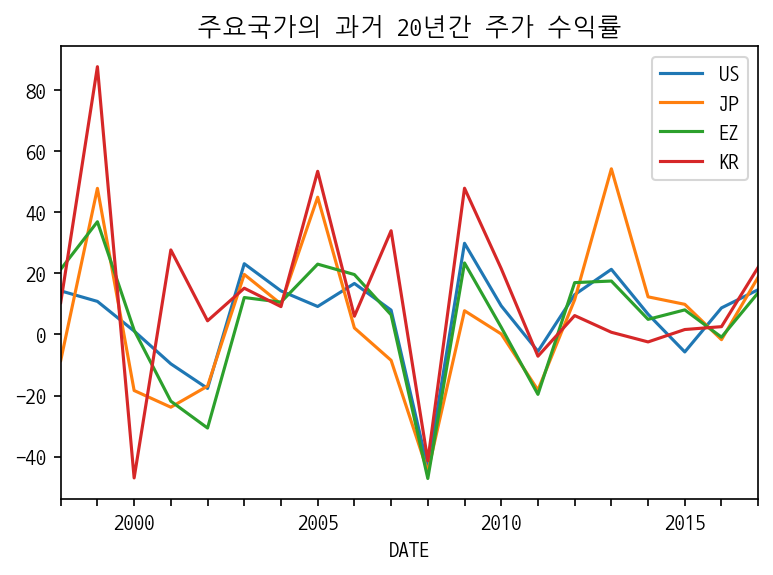

In [41]:
# 연간수익률 시각화
plt.rcParams['figure.dpi'] = 150

df.T.plot()
plt.title("주요국가의 과거 20년간 주가 수익률")
plt.xticks(df.columns)
plt.show()

In [44]:
# PCA분석을 통해 주요국가의 주가움직임에 따른 경기변동을 살펴보기
pca = PCA(n_components=1)
w = pca.fit_transform(df)

# 세계주가의 공통요인 즉, 평균값을 구하기
m = pca.mean_

# 나라별로 주가를 다르게 하는 요인은 주성분으로 구할 수 있다.
p1 = pca.components_[0]

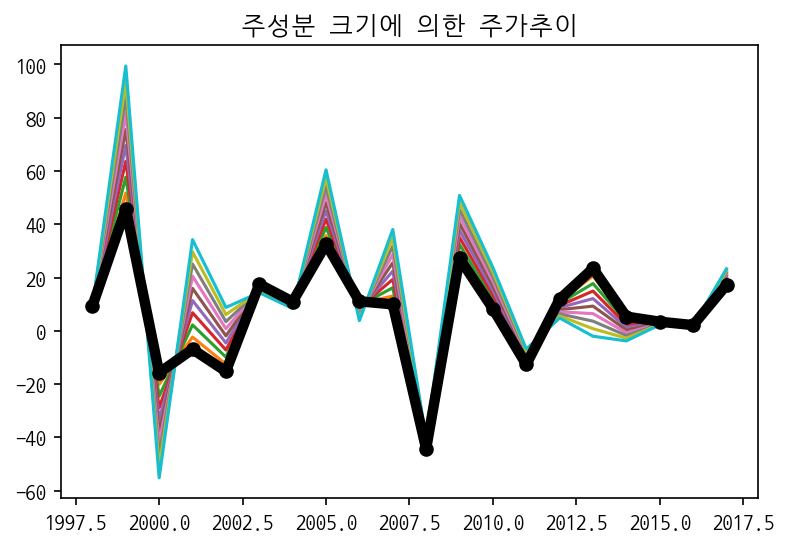

In [45]:
# 주성분크기에 따른 주가변동(시각화)
for i in np.linspace(0, 100, 10):
    plt.plot(range(1998, 2018), pca.mean_ + p1 * i)
    
plt.plot(range(1998,2018), pca.mean_, "ko-", lw=5)
plt.title("주성분 크기에 의한 주가추이")
plt.show()

# 결과분석
# 평균주가로 부터 주성분이 더해질 수록 주가의 형태가 변동되는 추이를 볼 수가 있다.
# 굵은 선은 평균주가이고 나머지 주가는 주성분이 점점 많이 추가됨에 따라 주가의 변동을 표시한 것이다.

#### 실습 5. 올리베티 얼굴테이터 (PCA)

올리베티 얼굴 데이터로 PCA분석하기, 올리베티 얼굴사진중 특정 인물의 사진 10장을 데이터로 사용.

In [46]:
from sklearn.datasets import fetch_olivetti_faces
faces_all = fetch_olivetti_faces()

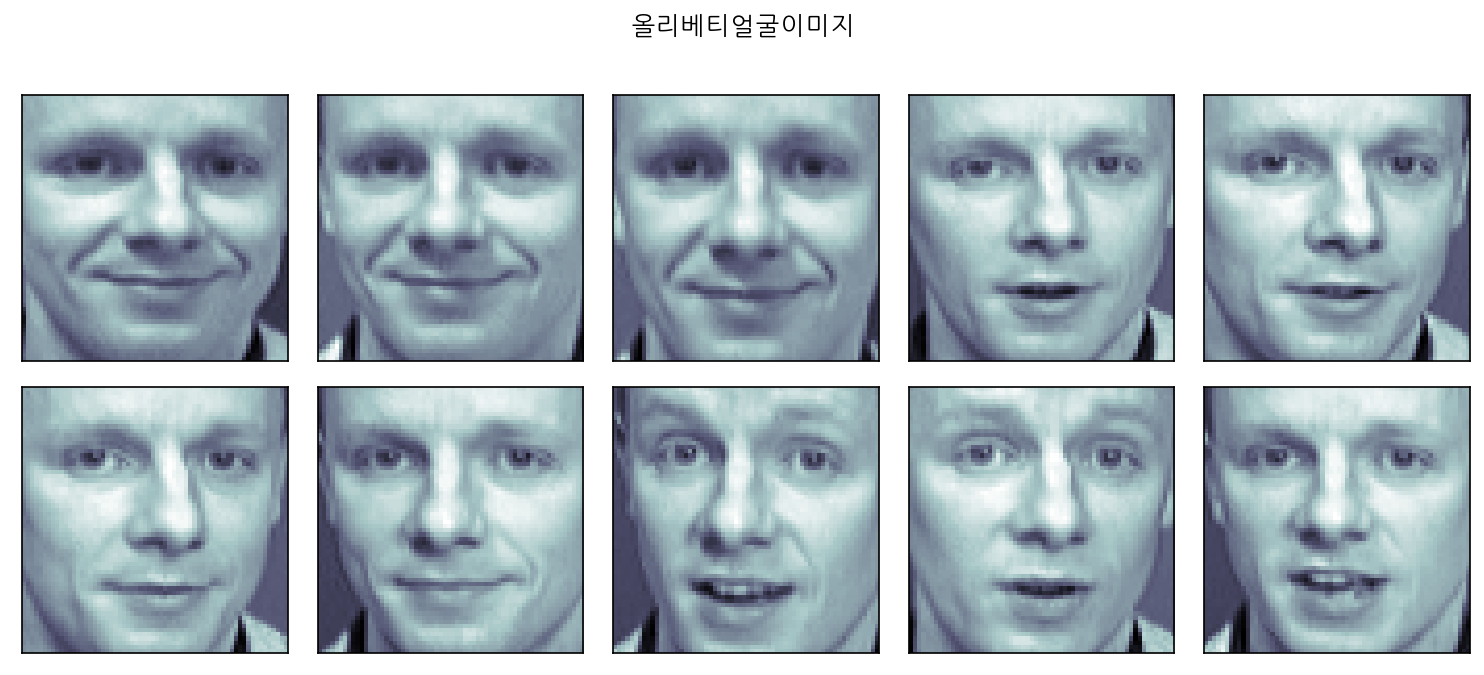

In [47]:
K = 20
faces = faces_all.images[faces_all.target == K] # 사진아이디가 20번인 얼굴이미지

N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])        

plt.suptitle("올리베티얼굴이미지")
plt.tight_layout()
plt.show()

In [48]:
# 주성분이 2개인 PCA분석실행하기
pca = PCA(n_components=2)
X = faces_all.data[faces_all.target == K]
W = pca.fit_transform(X)
X2 = pca.inverse_transform(W)

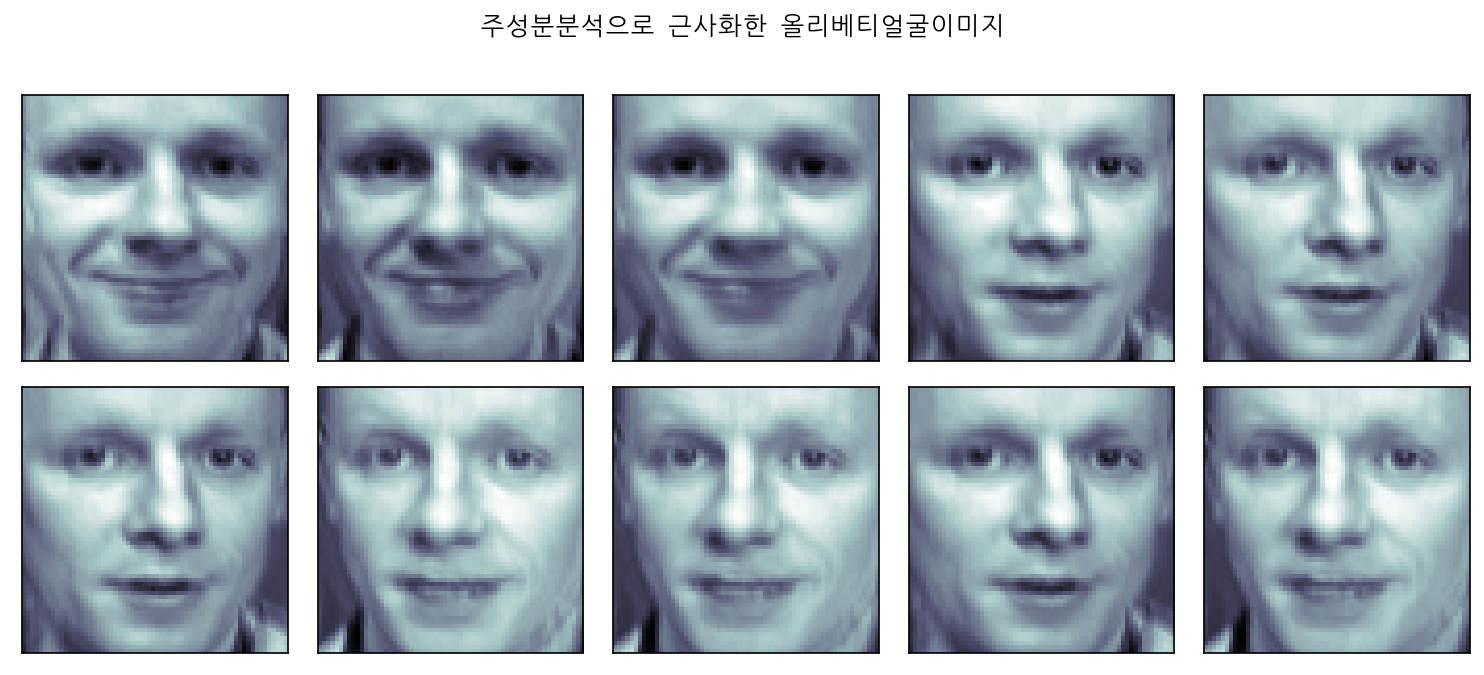

In [49]:
# 주성분분석으로 근사치로 구한 이미지의 시각화
N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X2[k].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])        

plt.suptitle("주성분분석으로 근사화한 올리베티얼굴이미지")
plt.tight_layout()
plt.show()

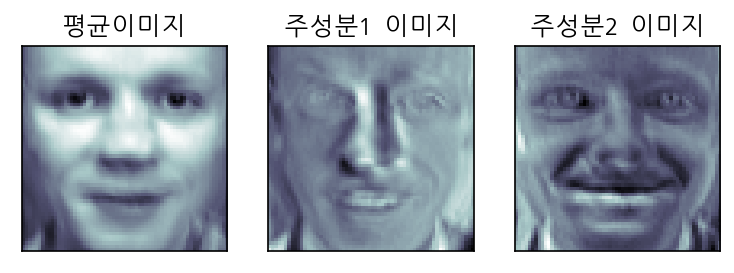

In [50]:
# 20번 얼굴이미지들을 평균값과 2개의 주성분으로 이미지 시각화하기
face_mean = pca.mean_.reshape(64,64)
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균이미지")

face_p1 = pca.components_[0].reshape(64,64)
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분1 이미지")

face_p2 = pca.components_[1].reshape(64,64)
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분2 이미지")

plt.show()

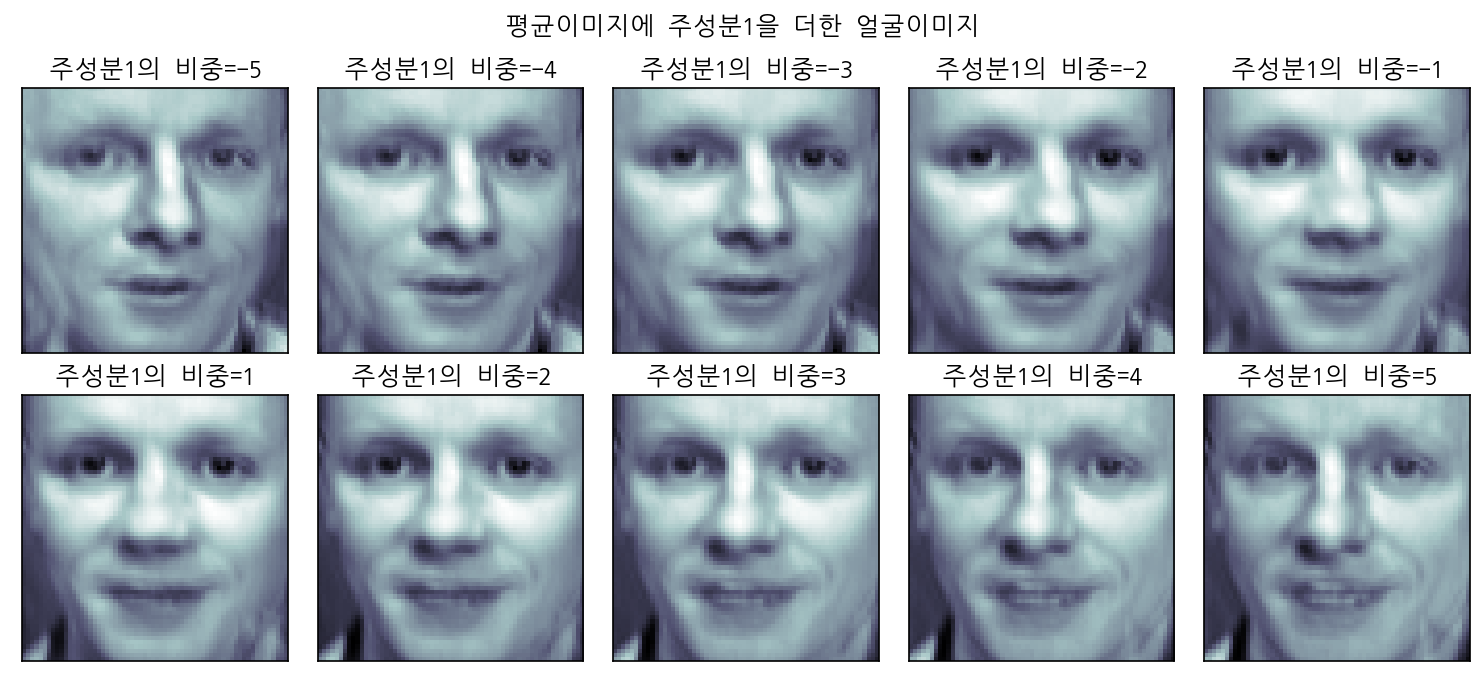

In [51]:
# 상기이미지만으로는 주성분이 각각 어떤 의미를 갖는지 알기 어렵기 때문에 
# 평균이미지에 주성분1 이미지를 더한(가중치) 이미지를 시각화하기

N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        
        weight = k-5 if k < 5 else k-4
        
        ax.imshow(face_mean + weight * face_p1, cmap=plt.cm.bone)
        
        
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])     
        plt.title("주성분1의 비중={}".format(weight))

plt.suptitle("평균이미지에 주성분1을 더한 얼굴이미지")
plt.tight_layout()
plt.show()

# 결과분석
# 평균이미지에 주성분1에 가중치를 주어서 그린 이미지는 첫번쨰 주성분은 왼쪽과 오른쪽에서 바라본 이미지의
# 차이를 미세하게 나타낸 것을 볼 수가 있다.